In [435]:
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mt
import pandas as pd
import numpy as np
from scipy.io import loadmat
import math
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score as auc_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, ClassifierMixin
import sklearn.utils
# from pomegranate import MultivariateGaussianDistribution, GeneralMixtureModel


In [436]:
import pandas as pd

def import_Iris():
    # Specify the path to the CSV file
    directory = "/home/nassosliak/Desktop/avlsi/archive/Iris.csv"
    
    # Read the CSV file into a DataFrame
    TDD_data = pd.read_csv(directory)
    
    # Display the shape and first row before processing
    print("Before processing:")
    print(TDD_data.shape)
    print(TDD_data.iloc[0, :])
    
    # Convert the 'Species' column to numeric integer values
    TDD_data['Species'] = TDD_data['Species'].astype('category').cat.codes
    TDD_data = TDD_data.drop('Id', axis=1) # get rid of the Id column - don't need it
    # Convert the DataFrame to a NumPy array
    TDD_data = TDD_data.to_numpy()
    
    # Display the shape and first row after processing
    print("After processing:")
    print(TDD_data.shape)
    print(TDD_data[0, :])
    
    return TDD_data

# Call the function to import and process the Iris dataset
import_Iris()


Before processing:
(150, 6)
Id                         1
SepalLengthCm            5.1
SepalWidthCm             3.5
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 0, dtype: object
After processing:
(150, 5)
[5.1 3.5 1.4 0.2 0. ]


array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [437]:
def import_CHA():
    #change it to what ever
    directory = "/home/nassosliak/Desktop/avlsi/thyroid_disease/allhypo.data"

    CHA_data = pd.read_csv(directory).to_numpy()

    print(CHA_data.shape)
    print(CHA_data[0, :])
    print("222222222222222222222222222222222")
    print(CHA_data[:, 0])

    return CHA_data

In [438]:
def import_dataset(dataset="Iris", ecoli_ID=[0], epilepsy_plus=None,
               patient=None):
    if dataset == "PID":
        data = import_PID()
        x = data[:, 0:8]
        y = data[:, 8]
    elif dataset == "TDD":
        data = import_TDD()
        x = data[ :, 1:4]
        y = data[:,5] 
    elif dataset == "Iris":
        data = import_Iris()
        x = data[:,0:4]
        y = data[:,-1]    
        scaler=StandardScaler()
        scaler.fit(x)
        x = scaler.transform(x)
    elif dataset== "CHA":
        data=import_CHA()
        y=[]
        s=[]
        for i in range(len(data[:, 0])): 
            if data[i, 29][0] == "n":
                y.append(0)
            elif data[i, 29][0] == "c":
                y.append(1)
            elif data[i, 29][0] == "p":
                y.append(2)
            elif data[i, 29][0] == "s":
                s.append(i)
            else:
              print("error")
        y=np.array(y)   
        print(y)
        print(len(data[1, :]))
        x=[]
        x.append(data[:, 0])
        x.append(data[:, 17])
        x.append(data[:, 19]) 
        x.append(data[:, 21])
        x.append(data[:, 23])
        x.append(data[:, 25])
        x=np.array(x) 
        x=np.transpose(x)
        print(x)
        print(x[0,1])
        x_t=[]
#         print(len(x[0]))
#         print(len(x))
#         print(x.shape)
        s.append(0)
        print(s)
        mean=np.zeros(len(x[0]))
        number_mean=np.zeros(len(x[0]))
        for i in range(len(x[0])):
          s_t=0
          x_t1=[]
          for j in range(len(x)):
            if j==s[s_t]:
              s_t+=1
            else:
              if x[j, i] != "?":
                x_t1.append(float(x[j,i]))
                number_mean[i]+=1
                mean[i]+=float(x[j,i])
              else :
                x_t1.append(x[j,i])
          x_t.append(x_t1) 
          mean[i]=float(mean[i]/number_mean[i])
        x=np.array(x_t) 
        x=np.transpose(x)
        for i in range(0,len(x[0])):
          for j in range(0,len(x)):
            if x[j, i] == "?":
              x[j, i] =mean[i]
                             
    elif dataset == "BCD":
        data = import_BCD()
        x = data[:, 0:7]
        y = data[:, 7]
        for i in range(y.shape[0]):
            if y[i] == "M":
                y[i] = 0
            elif y[i] == "B":
                y[i] = 1
            else:
                raise ValueError(y[i])
    elif dataset == "ecoli":
        data = import_ecoli()
        x = data[:, 0:7]
        y = data[:, 7]
        # for c in range(np.unique(y).shape[0]):
        #     print(y[y == c].shape)

        mask = np.zeros(y.shape)
        if ecoli_ID is None:
            mask[y == 0] = 0
            mask[y == 1] = 1
            mask[y == 2] = 2
            mask[y == 3] = 1
            mask[y == 4] = 2
            mask[y == 5] = 3
            mask[y == 6] = 3
            mask[y == 7] = 3
        else:
            counter = 1
            for item in ecoli_ID:
                if item < 0:
                    item = 0
                    print("ID is set to 0")
                if item > 7:
                    item = 7
                    print("ID is set to 7")
                mask[y == item] = counter
                counter += 1

        y = mask.astype(np.int)
    elif dataset == "Epilepsy":
        if epilepsy_plus is None:
            x, y = epilepsy_load_data(wave_length=wave_time_length, selected=patient)
            y = y.squeeze()
            # fs = 256
            # time_length = 10

            o_y = np.copy(y)
            o_y[y == 2] = 1.5
            o_y[y == 1] = 2
            o_y[y == 0] = 1
            o_y[y == 3] = 0

            # time = np.linspace(0, o_y.shape[0] / fs, o_y.shape[0])
            # plt.figure()
            # plt.plot(time, o_y)
            # plt.show()

            # x = x[np.logical_not(y==1), :]
            # y = y[np.logical_not(y==1)]
            # print(np.unique(y))
            # for i in range(0, x.shape[0], 360):
            #     # print(i)
            #     print(y[i:(i+360)])

            # print(np.mean(x[y == 0, 8]))
            # print(np.mean(x[y == 3, 8]))
            # print(x[:, 8].shape)
            # print(x.shape)
            # raise ValueError

            # x = x[np.logical_or(y == 0, y == 3), :]
            # y = y[np.logical_or(y == 0, y == 3)]
            # # x = x[np.logical_or(np.logical_or(y == 0, y == 3), y == 2), :]
            # # y = y[np.logical_or(np.logical_or(y == 0, y == 3), y == 2)]
            # y[y == 1] = 0
            # y[y == 2] = 0
            # y[y == 3] = 1
        else:
            x_train = None
            for i in range(len(epilepsy_plus[0]) - epilepsy_plus[1]):
                print(i)
                if x_train is None:
                    x_train, y_train = epilepsy_load_data(wave_length=wave_time_length, selected=epilepsy_plus[0][i])
                    y_train = y_train.squeeze()
                else:
                    temp_x, temp_y = epilepsy_load_data(wave_length=wave_time_length, selected=epilepsy_plus[0][i])
                    temp_y = temp_y.squeeze()
                    x_train = np.append(x_train, temp_x, axis=0)
                    y_train = np.append(y_train, temp_y)

            scaler = StandardScaler()
            x_train = scaler.fit_transform(x_train)
            # fs = 256
            # time_length = 10

            o_y_t = np.copy(y_train)
            o_y_t[y_train == 2] = 1.5
            o_y_t[y_train == 1] = 2
            o_y_t[y_train == 0] = 1
            o_y_t[y_train == 3] = 0

            x_val = None
            for i in range(len(epilepsy_plus[0]) - epilepsy_plus[1], len(epilepsy_plus[0])):
                print(i)
                if x_val is None:
                    x_val, y_val = epilepsy_load_data(wave_length=wave_time_length, selected=epilepsy_plus[0][i])
                    y_val = y_val.squeeze()
                else:
                    temp_x, temp_y = epilepsy_load_data(wave_length=wave_time_length, selected=epilepsy_plus[0][i])
                    temp_y = temp_y.squeeze()
                    x_val = np.append(x_val, temp_x, axis=0)
                    y_val = np.append(y_val, temp_y)

            # x_val, y_val = epilepsy_load_data(wave_length=wave_time_length, selected=epilepsy_plus[len(epilepsy_plus)-1])
            # y_val = y_val.squeeze()
            x_val = scaler.transform(x_val)
            # fs = 256
            # time_length = 10

            o_y_v = np.copy(y_val)
            o_y_v[y_val == 2] = 1.5
            o_y_v[y_val == 1] = 2
            o_y_v[y_val == 0] = 1
            o_y_v[y_val == 3] = 0

    else:
        raise ValueError("Wrong dataset name")

    # if epilepsy_plus is None:
    #     ratio = []
    #     for i in np.unique(y):
    #         ratio += [np.count_nonzero(y == i) / y.shape[0]]

    if dataset == "Epilepsy":
        if epilepsy_plus is None:
            return x, y, o_y
        else:
            return x_train, y_train, x_val, y_val, o_y_v  # , o_y_v
    else:
        return x, y # return data, labels


''' 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Train Model
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
'''

'''
Also check for youtube videos on simple classifiers in python 
'''

'\nAlso check for youtube videos on simple classifiers in python \n'

In [439]:
from sklearn.metrics.cluster import adjusted_rand_score
x,y=import_dataset("Iris")
gmm = GaussianMixture(n_components=3,covariance_type="full")
gmm.fit(x)
x,y,xval,yval,nclass=stratified_split(x,y,0.7,0)
# predict the cluster for each data point
y_cluster_gmm = gmm.predict(x)
y_cluster_gmm
score = adjusted_rand_score(y, y_cluster_gmm)
score



Before processing:
(150, 6)
Id                         1
SepalLengthCm            5.1
SepalWidthCm             3.5
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 0, dtype: object
After processing:
(150, 5)
[5.1 3.5 1.4 0.2 0. ]
11111111111111111111111111111111111111111111111111111111
number of classes 3


0.9434339556238102

In [440]:
y_cluster_gmm = gmm.predict(xval)
y_cluster_gmm
score = adjusted_rand_score(yval, y_cluster_gmm)
score

0.8128544423440454

In [441]:
def stratified_split(x_u, y_u, ratio = 0.7, ran_state=0):
    nclass = int(np.max(y_u)+1)
    #nclass=3
    print("11111111111111111111111111111111111111111111111111111111")
    print("number of classes", nclass)

    x, y = sklearn.utils.shuffle(x_u, y_u, random_state=ran_state)

    x_d = x[y == 0, :]
    y_d = y[y == 0]
    train_len = int(ratio * x_d.shape[0])
    x_train_u = x_d[0:train_len]
    y_train_u = y_d[0:train_len]
    x_val_u = x_d[train_len:]
    y_val_u = y_d[train_len:]
    for d in range(1, nclass):
        x_d = x[y == d, :]
        y_d = y[y == d]
        train_len = int(ratio * x_d.shape[0])
        x_train_u = np.append(x_train_u, x_d[0:train_len], axis=0)
        y_train_u = np.append(y_train_u, y_d[0:train_len], axis=0)
        x_val_u = np.append(x_val_u, x_d[train_len:], axis=0)
        y_val_u = np.append(y_val_u, y_d[train_len:], axis=0)

    x_train, y_train = sklearn.utils.shuffle(x_train_u, y_train_u, random_state=ran_state)
    x_val, y_val = sklearn.utils.shuffle(x_val_u, y_val_u, random_state=ran_state)

    return x_train, y_train, x_val, y_val, nclass

class GMM_touloup(BaseEstimator, ClassifierMixin):
    """
    Simple GMM built as reference for the Analog Implementation
    Sklearn package "GaussianMixture" is all you need


    What you need:
    %%%%%%%%%%%%%%%%%
    Model related functions
    %%%%%%%%%%%%%%%%%
    .fit(train_data, train_labels) -> to train the model
    .predict(test_data) -> to get the model's predictions
        or
    .score(test_data, test labels) -> to get the model's score on the test data
    %%%%%%%%%%%%%%%%%
    parameter extraction related functions
    %%%%%%%%%%%%%%%%%
    .get_M(class_id, cluster_id, feature_id) -> to get the requested mean value (cluster_id = 0 gia bayesian model)
    .get_Vc(a_sigma_2) -> to get the Vc voltage of the specified sigma_2 (you will need to rewrite this based on your
                            bump circuit
    .transform(test_data, V_range)

    """

    def __init__(self, n_classes=3, list_n_mixtures=[2, 2], cov="diag", pmos=False, real=False, ratio=[],
                 current_mode=None, normalize=False, Vrange=(1.25,1.4)):
        """
        :param n_classes:  number o classes for the classifier
        :param list_n_mixtures: a list containing the number of clusters for each class, currently the analog model
                 works only for the same number of clusters per class
        :param cov: covariance matrix type
                :keyword "orth": orthogonal covariance matrix (default)
                 :keyword "diag": diagonal covariance matrix
        :param pmos: this refers to the analog model, is it made of PMOS Bump circuits (False/True)
        :param real: this refers to the analog model, should the inputs bhe quantized, as if they are obtained from
                    an ADC
        :param ratio: pre-decided weights for each class
        TODO: this should be done automatically
        :param current_mode: this refers to the analog model, is the WTA bump circuit used (False/True)
        :param normalize: not used, I do not remember what is this for
        :param Vrange: the operational range of the circuit
        """
        self.n_classes = n_classes
        self.list_n_mixtures = list_n_mixtures
        self.cov = cov
        self.real = real
        self.pmos = pmos
        self.ratio = ratio
        self.cmode = current_mode
        self.Vrange = Vrange

    def fit(self, X, y):
        """
        Trains the classifier
        :param X: 2D numpy array containing the training data
        :param y: 1D numpy array containing the training labels
        :return: none
        """
        self.M = []
        self.sigma2 = []
        self.model = []
        X_t = self.fit_transform(X)
        print(self.n_classes)
        
        for n in range(self.n_classes):
            mask = y == n
            self.model.append(GaussianMixture(n_components=self.list_n_mixtures[n], covariance_type=self.cov))
            self.model[-1].fit(X_t[mask])
            M = np.copy(self.model[-1].means_)
#             print("=====================MMMMMMMMMMM")
#             print(M)
            sigma2 = np.copy(self.model[-1].covariances_)
            self.M.append(M)
            self.sigma2.append((sigma2))

        self.max_s = math.sqrt(np.max(self.sigma2))
        self.min_s = math.sqrt(np.min(self.sigma2))
        self.fix_I()
        print(self.max_s)

        print(self.min_s)

        print(self.sigma2)

    def get_M(self, i, k, j):
        """

        :param i: specifies the class
        :param k: specifies the cluster
        :param j: specifies the dimension / feature
        :return: the original or the quantized mean matrix element
        """
        if self.real:
            temp = 1000 * self.M[i][k, j]
            temp = int(temp / 2)
            qauntized_m = 2 * temp / 1000
            return qauntized_m
        else:
            return self.M[i][k, j]

    def fit_transform(self, x_flat, Vrange = None):
        """
        Fits the transformer and transforms the training input to the desired range (e.g. [-0.1, 0.2])
        using the maximum and minimum values of the original data
        :param x_flat: 2D numpy array containing the training data
        :return: the transformed 2D numpy array
        """
        if Vrange is None:
            Vrange = self.Vrange
        if self.real:
          x_flat=x_flat.astype(float)
        max_x = np.max(x_flat, axis=0)
        min_x = np.min(x_flat, axis=0)

        #########################
        # Testing
        med = np.mean(x_flat, axis=0)
        # med = np.median(x_flat, axis=0)
        max_x = med + (max_x - med ) / 6
        #max_x = max_x - med/2 + 1.5*std_x
        #max_x=max_x
        min_x = min_x
        #max_x = med + 3 * std_x
        #min_x =med - 3 * std_x
        #print("00000000000000000000000000000000000000000000000")
        #print(max_x)
        #print(min_x)
        #########################

        # mean_x = np.median(x_flat, axis = 0)

        new_x_flat = np.zeros(x_flat.shape)

        self.sup_x = max_x
        self.inf_x = min_x

        for dim in range(x_flat.shape[1]):
            if max_x[dim] - min_x[dim] != 0:
                #print("####################")
                #print(dim)
                #print(x_flat[:, dim] - min_x[dim])
                #print(max_x[dim] - min_x[dim])
                #print(max_x[dim])
                #print(min_x[dim])
                #print(Vrange[1])
                #print(Vrange[0])
                temp = (x_flat[:, dim] - min_x[dim]) / (max_x[dim] - min_x[dim])
                # print("No")
                if self.cmode is None:
                    new_x_flat[:, dim] = temp * (Vrange[1] - Vrange[0]) + Vrange[0]
                else:
                    new_x_flat[:, dim] = temp * (self.cmode[1] - self.cmode[0]) + self.cmode[0]


            else:
                temp = x_flat[:, dim] / min_x[dim]
                if self.cmode is None:
                    new_x_flat[:, dim] = temp * (Vrange[1] - Vrange[0]) + Vrange[0]
                else:
                    new_x_flat[:, dim] = temp * (self.cmode[1] - self.cmode[0]) + self.cmode[0]

        # for k in range(13):
        #     print(x_flat[:,k])
        #     print(new_x_flat[:,k])
        #     t = input("waiting")
        if self.cmode is None:
            new_x_flat[new_x_flat > Vrange[1]] = Vrange[1]
            new_x_flat[new_x_flat < Vrange[0]] = Vrange[0]
        else:
            new_x_flat[new_x_flat > self.cmode[1]] = self.cmode[1]
            new_x_flat[new_x_flat < self.cmode[0]] = self.cmode[0]
        return new_x_flat

    def fit_transform_old(self, x_flat):
        """
        Transforms any input to the desired range (e.g. [-0.15, 0.2]) excluding
        distant outlining values
        :param x_flat: 2D numpy array containing the training data
        :return: the transformed 2D numpy array

        Not used if _old is added
        """
        sup_x = np.max(x_flat, axis=0)
        inf_x = np.min(x_flat, axis=0)

        med_x = np.median(x_flat, axis=0)
        std_x = np.std(x_flat, axis=0)

        max_x = med_x + 3 * std_x
        min_x = med_x - 3 * std_x

        for dim in range(x_flat.shape[1]):
            if sup_x[dim] < max_x[dim]:
                sup_x[dim] = max_x[dim]
            if inf_x[dim] > min_x[dim]:
                inf_x[dim] = min_x[dim]

        self.sup_x = sup_x
        self.inf_x = inf_x
        # print(max_x)
        # print(min_x)

        new_x_flat = np.zeros(x_flat.shape)
#changed from 0.6 and 0.3 to 4.4 and 2.2
        for dim in range(x_flat.shape[1]):
            if sup_x[dim] - inf_x[dim] != 0:
                temp = (x_flat[:, dim] - inf_x[dim]) / (sup_x[dim] - inf_x[dim])
                new_x_flat[:, dim] = temp * 0.6 - 0.3
            else:
                temp = (x_flat[:, dim] - inf_x[dim])
                new_x_flat[:, dim] = temp * 0.6 - 0.3

        # for k in range(13):
        #     print(x_flat[:,k])
        #     print(new_x_flat[:,k])
        #     t = input("waiting")
        new_x_flat[new_x_flat > 0.3] =  0.3
        new_x_flat[new_x_flat < -0.3] = -0.3

        return new_x_flat

    def transform(self, x_flat, Vrange = None):
        """
        Transforms the given input to the desired range (e.g. [-0.15, 0.2])
        using the maximum and minimum values of the original data
        :param x_flat: 2D numpy array containing the training data
        :return:
        """

        if Vrange is None:
            Vrange = self.Vrange
        new_x_flat = np.zeros(x_flat.shape)

        for dim in range(x_flat.shape[1]):
            if self.sup_x[dim] - self.inf_x[dim] != 0:
                temp = (x_flat[:, dim] - self.inf_x[dim]) / ( self.sup_x[dim] - self.inf_x[dim])
                # print(new_x_flat.shape)
                if self.cmode is None:
                    new_x_flat[:, dim] = temp * (Vrange[1] - Vrange[0]) + Vrange[0]
                    # Don't forget to change fit_transform too
                else:
                    new_x_flat[:, dim] = temp * (self.cmode[1] - self.cmode[0]) + self.cmode[0]
            else:
                temp = x_flat[:, dim] / self.inf_x[dim]
                if self.cmode is None:
                    new_x_flat[:, dim] = temp * (Vrange[1] - Vrange[0]) + Vrange[0]
                else:
                    new_x_flat[:, dim] = temp * (self.cmode[1] - self.cmode[0]) + self.cmode[0]

        if self.cmode is None:
            new_x_flat[new_x_flat > Vrange[1]] = Vrange[1]
            new_x_flat[new_x_flat < Vrange[0]] = Vrange[0]
        else:
            new_x_flat[new_x_flat > self.cmode[1]] = self.cmode[1]
            new_x_flat[new_x_flat < self.cmode[0]] = self.cmode[0]

        return new_x_flat

    def get_Vc_old(self, sigma2, real=False):
        """
        Transforms the extracted from the GMM sigma square
        :param sigma2: sigma square that needs to be transformed
        :param real: return quantized or not
        :return: The Vc signal for the Analog circuit

        Not used if _old is added
        """

        sigma = math.sqrt(sigma2)
        new_sigma = (sigma - self.min_s) / (self.max_s - self.min_s)
        Vc = 0.6 * new_sigma - 0.3

        return Vc

    def get_Vc(self, sigma2, real=False):
        """
        Transforms the extracted from the GMM sigma square
        :param sigma2: sigma square that needs to be transformed
        :param real: return quantized or not
        :return: The Vc signal for the Analog circuit
        """
        sigma = math.sqrt(sigma2)
        if self.pmos:
            if real:
                #print(sigma)
                if self.cmode is None:
                    Vc = 0.002775*sigma**2 + 0.008315*sigma + 0.05751
                else:
                    Vc = 0.002775*sigma**2 + 0.008315*sigma + 0.05751
                Vc = - Vc
                if Vc < -0.6:
                    Vc = -0.6
                elif Vc > 0.2:
                    Vc = 0.2
                temp = 1000 * Vc
                temp = int(temp / 2)
                Vc = 2 * temp / 1000
                #print(Vc)
            else:
                if self.cmode is None:
                    Vc = 0.002775*sigma**2 + 0.008315*sigma + 0.05751
                else:
                    Vc = -0.4
                #Vc = - Vc
                if Vc < -0.4:
                    Vc = -0.4
                elif Vc > 0.6:
                    Vc = 0.6
        else:
            if real:
                print("1111111111############")
                #print(sigma)
                Vc = -0.9166 *sigma**3 + 21.88 *sigma**2 - 29.37*sigma + 9.056
                #print(Vc)
                if Vc < -0.2:
                    Vc = -0.2
                elif Vc > 0.2:
                    Vc = 0.2
                # print(Vc)
                temp = 1000 * Vc
                temp = int(temp / 2)
                Vc = 2 * temp / 1000
                # print(Vc)
            else:
               # print("4444444444############")
                #print(sigma)
                if self.cmode is None:
                    #Vc = (sigma - 0.07) * 15 - 0.3
                   Vc = 1.196e+05 *sigma**3 - 4857 *sigma**2+ 97.77 *sigma - 0.3836
                    #Vc=1.8*sigma-0.9
                    #print("Vc")
                    #print(Vc)
                else:
                    Vc = 0
                if Vc < 0:
                    Vc = 0
                elif Vc >1:
                    Vc = 1

        return Vc

    def fix_I(self):
        """
        ????
        :return:
        """
        self.det_sigma = []
        mx = 0
        mn = -1
        for n in range(self.n_classes):
            temp = np.zeros(self.list_n_mixtures[n])
            for m in range(self.list_n_mixtures[n]):
                diag_sigma = np.diag(self.sigma2[n][m])
                temp[m] = 1 / math.sqrt(2 * math.pi * np.linalg.det(diag_sigma))
#                 print("2222222222222222222222222222222222222222222222")
#                 print(temp[m])
                if temp[m] > mx:
                    mx = temp[m]
                elif mn == -1 or temp[m] < mn:
                    mn = temp[m]

            self.det_sigma += [temp]

        for n in range(self.n_classes):
            print("##################################")
            self.det_sigma[n] = (self.det_sigma[n] - mn) / (mx - mn)
            print("sigma class", n, ":", self.det_sigma[n])
            self.det_sigma[n] = self.det_sigma[n] * 0 + 4 #0

    def predict(self, X, transform=False):

        if transform:
            X_t = self.transform(X)
        else:
            X_t = np.copy(X)

        likelihoods = np.empty((X_t.shape[0], self.n_classes))
        for i in range(self.n_classes):
            if self.ratio != []:
                likelihoods[:, i] = self.model[i].score_samples(X_t) * self.ratio[i]
            else:
                likelihoods[:, i] = self.model[i].score_samples(X_t)

        predictions = np.argmax(likelihoods, axis=1)
        return predictions

    def score(self, X, y, transform=False):
        predictions = self.predict(X, transform=transform)
        error = np.count_nonzero(predictions - y_train)
        acc = (y_train.shape[0] - error) / y_train.shape[0]
        return acc



if 0:
    """
    example code for training the model
    Might need minor fixes
    """

    '''
    Importing the data
    '''
    dataset = "CHA"
    x, y = import_dataset(dataset=dataset)

    x_train, y_train, x_val, y_val = utl.stratified_split(x, y, ran_state=ran_state)

    '''
    Training the model
    '''
    nclass = 3
    k = 1
    model = GMM(n_classes=nclass, list_n_mixtures=[k, k, k], Vrange=(1.25,1.4))
    print(x_train)
    print(y_train)

    model.fit(x_train, y_train)


    '''
    Checking on the train accuracy
    '''
    predictions = model.predict(x_train, transform=True)
    error = np.count_nonzero(predictions - y_train)
    acc = (y_train.shape[0] - error) / y_train.shape[0]

    print("Train accuracy is", acc)

    '''
    Checking on the validation accuracy
    '''

    predictions = model.predict(x_val, transform=True)

    error = np.count_nonzero(predictions - y_val)
    acc = (y_val.shape[0] - error) / y_val.shape[0]

    print("Validation accuracy is", acc)
    print(classification_report(y_val, predictions))
    print(confusion_matrix(y_val, predictions))


    '''
    After that check the example code below for importing data into cadence
    '''

    x_val_for_cadence = model.transform(x_val) #tha diaspastei gia na ftiaxtoun ta Vlist
    # to x_val_for_cadence einai px 500 epi 5, theloume na diaspastei se 5 listes (or 1D nparrays)
    # pou einai 500 epi 1
    # px list_0 = x_val_for_cadence[:, 0]
    # use create_file() (edw 5 fores)



''' 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Cadence related functions: To import data into Cadence
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
'''

' \n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\nCadence related functions: To import data into Cadence\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n'

In [442]:
def change_variables_file(folder = "variables files", Vdiction ={}, bypass = "variables"):
    """
    1) Export Design variables from ADE Assembler to "variables.csv" file using "Export to CSV" option
    2) Transfer it to your PC (ctrl+c and ctrl+v or by winSCP)
    3) AFTER the training transfer "variables_new.csv" back to the server and copy its contents back into "variables.csv". Save "variables.csv"
    4) You can now import the variables into the test in Assembler from "variables.csv" (NOT "variables_new.csv")

    :param folder: the directory to the variable file
    :param Vdiction:
    :param bypass:
    :return: creates a new variables file in the same directory

    Return the variables file to where you took the variable file
    """
    path = folder + "/" #takes a dictionary (key = name, value = τιμη of the parameter i want to change)
    df = pd.read_csv(path + "variables.csv", header=0)
    
    k = 0
    while k < len(df.index): #reads the dictionary and changes what we want to change
        var_name = '"'+df['Name'].values[k]+'"' #Name of the variable that appears in the csv file
        if (var_name in Vdiction):
            df.loc[k, 'Value'] = Vdiction.pop(var_name).replace('"', '') #Raises warning of incompatible dtype, just ignore it... :)
        k += 1
    
    df.to_csv(path+'variables_new.csv', index=False)
    if Vdiction:
        print("Something went wrong; the following variables didn't get properly set in variables.csv file:")
        for item in Vdiction:
            print(item)

In [443]:
def create_file(Vlist, delay=10, filename="", current=None, continuous=None):
    """
    An exw 5 diastaseis to trexw 5 fores
    Vpwlf (nomizw) kai transient analysis (set max step to 1u)
    (to arxeio tha sou pei posa usec na trekseis thn transient)
    (mhn ksexaseis to step!!!)

    :param Vlist: the list of voltages that will be transformed into a pulse series
    :param delay: delay between changing an input, 10 means 10 usec
    :param filename: the name of the file -> "variables" is proposed
    :param current: save currents instead of voltages
    :param continuous: import a real signal instead of pulses
    :return:
    """

    Varray = np.array(Vlist)
    if continuous is None:
        Total_time = Varray.shape[0]*delay
        if current is None:
            '''
            Last safeguard to not exceed your supply rails
            '''
            Varray[Varray > 2.2] =  2.2
            Varray[Varray < 0] = 0
        else:
            Varray[Varray > current[1]] = current[1]
            Varray[Varray < current[0]] = current[0]

        Varray_extended = np.zeros(len(Vlist)*2)
        t = np.zeros(len(Vlist) * 2)

        for k in range(len(Vlist)):
            Varray_extended[2*k:2*(k+1)] = Varray[k]
            t[2*k] = delay*k
            t[2*k + 1] = delay*(k+1) - 0.5

        Varray_printed = np.zeros((len(Vlist)*2, 2))

        Varray_printed[:, 0] = t*1e-6
        if current is None:
            Varray_printed[:, 1] = Varray_extended
        else:
            Varray_printed[:, 1] = Varray_extended*1e-9

        # print(Varray_printed)
        np.savetxt(filename + ".csv", Varray_printed, delimiter=" ")

        print(Total_time, "usec")
    else:
        fs = 1/delay
        if current is None:
            Varray[Varray > 2.2] = 2.2
            Varray[Varray < 0] = 0
        else:
            Varray[Varray > current[1]] = current[1]
            Varray[Varray < current[0]] = current[0]

        Total_time = len(Vlist) / fs
        t = np.linspace(0, Total_time, num=len(Vlist))


        Varray_printed = np.zeros((len(Vlist), 2))
        Varray_printed[:, 0] = t

        if current is None:
            Varray_printed[:, 1] = Varray
        else:
            Varray_printed[:, 1] = Varray*1e-9

        # print(Varray_printed)
        np.savetxt(filename + ".csv", Varray_printed, delimiter=" ")

        print(Total_time, "sec")


if 0:
    """
    example code on creating the dictionary
    It does not work as it is
    """

    n = model.n_classes
    m = model.list_n_mixtures
    mean = model.get_M  # this returns the function that gives you the mean values
    sigma2 = model.sigma2

    Vdiction = {'"Vdd"': '"2.2"'}
    Vdiction['"Vss"'] = '"0"'
    Vdiction['"Ibias_WTA'] = '"70n"'
    # Vdiction['"Iwta2"'] = '"8n"'


    if prt:
        for j in range(max_dimensions):
            print("#####################")
            counter = 1
            for i in range(n):
                for k in range(m[i]):
                    name = '"' + "Vr" + str(counter) + str(j + 1) + '"'
                    jj = j - early
                    print(name + ':', np.round(mean(i, k, jj), 5), "Vc", np.round(sigma2[i][k, jj], 6))
                    counter += 1

    counter = 0
    for i in range(n):
        for k in range(m[i]):
            counter += 1
            if not_fixed_I:
                current = 10 * model.det_sigma[i][k]
                Vdiction['"Ibias' + str(counter) + '"'] = '"' + str(round(current, 1)) + 'n"'
            elif pmos:
                Vdiction['"Ibias' + str(counter) + '"'] = '"-40n"'
            else:
                Vdiction['"Ibias' + str(counter) + '"'] = '"40n"'

            for j in range(max_dimensions):
                early = max_dimensions - n_features
                name = '"' + "Vr" + str(counter) + str(j + 1) + '"'
                if j < early:
                    Vdiction[name] = '"' + str(0.3) + '"'
                else:
                    jj = j - early
                    if inverse_data:
                        Vdiction[name] = '"' + str(-mean(i, k, jj)) + '"'
                    else:
                        Vdiction[name] = '"' + str(mean(i, k, jj)) + '"'

            for j in range(max_dimensions):
                early = max_dimensions - n_features
                name = '"' + "Vc" + str(counter) + str(j + 1) + '"'
                if j < early:
                    Vc =0.3 #0.3
                else:
                    jj = j - early
                    if conv_matrix == "full":
                        Vc= model.get_Vc(sigma2[i][k, jj], real=quantized)
                        print("sigma: ", sigma2[i][k, jj])
                        # sigma = math.sqrt(sigma2[i][k,j])
                    else:
                        Vc = model.get_Vc(sigma2[i][k, jj, jj], real=quantized)
                        print("sigma: ", sigma2[i][k, jj])
                        # sigma = math.sqrt(sigma2[i][k,j,j])
                    # Vdiction[name] = '"' + str(fc.transform_Vc(sigma, errors = True)) + '"'

                Vdiction[name] = '"' + str(Vc) + '"'
    change_variables_file(folder="/home/nassosliak/Desktop/avlsi/Iris/variable", Vdiction=Vdiction)


''' 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Cadence related functions: Analyze data from Cadence
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
'''


' \n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\nCadence related functions: Analyze data from Cadence\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n'

In [444]:
# You can ignore that after V1d and V2d are removed from read_and_decode
def identify_voltages(directory, t, delay=10e-6):
    V1 = pd.read_csv(directory + "V1.csv").to_numpy()
    V2 = pd.read_csv(directory + "V2.csv").to_numpy()

    V1 = V1[:, 1]
    V2 = V2[:, 1]

    i = 0
    V1d = []
    V2d = []
    for k in range(t.shape[0]):
        if t[k] > delay * i + (3 * delay / 5):
            V1d += [V1[k]]
            V2d += [V2[k]]
            i = i + 1

    return np.array(V1d), np.array(V2d)


In [445]:
# You can remove V1d and V2d
def read_and_decode(directory, Ndata=300, delay=10e-6):
    """

    :param directory:
    :param Ndata:
    :param delay:
    :return:
    """
    directory = directory + "/"
    I1 = pd.read_csv(directory + "out1.csv").to_numpy()
    I2 = pd.read_csv(directory + "out2.csv").to_numpy()

    t = I1[:, 0]
    I1 = I1[:, 1]
    I2 = I2[:, 1]

    ppd = I1.shape[0] / Ndata
    # print(ppd)
    choosing_point = 3 * ppd / 4

    i = 0
    I1d = []
    I2d = []
    output = np.zeros(Ndata)
    for k in range(t.shape[0]):
        if t[k] > (delay * i + (4 * delay / 5)):
            I1d += [I1[k]]
            I2d += [I2[k]]
            # print(i , len(I1d))
            if I1d[i] < I2d[i]:
                output[i] = -1
            else:
                output[i] = 1
            i = i + 1

    I1d = np.array(I1d)
    I2d = np.array(I2d)

    V1d, V2d = identify_voltages(directory=directory, t=t, delay=delay)

    return output, V1d, V2d

# This is the most import function for this category

In [446]:
def read_and_decode_3C_all(
    directory, delay=10e-6, fair=True, prt_fair=False, bypass=True, new=True
):
    """

    :param directory:
    :param delay:
    :param fair:
    :param prt_fair:
    :param bypass:
    :param new:
    :return:
    """
    if bypass:
        tI3I2I1V1V2 = pd.read_csv(directory + "/Iris/cadence/all.csv").to_numpy()
    else:
        tI3I2I1V1V2 = pd.read_csv(directory + "/Iris/cadence/all.csv").to_numpy()

    if new:
        # Follow this order I1. I2. I3
        t = tI3I2I1V1V2[:, 0]
        I1 = tI3I2I1V1V2[:, 1]  # I1
        I2 = tI3I2I1V1V2[:, 2]  # I2
        I3 = tI3I2I1V1V2[:, 3]  # I3

    else:
        t = tI3I2I1V1V2[:, 0]
        V1 = tI3I2I1V1V2[:, 1]
        V2 = tI3I2I1V1V2[:, 2]
        I1 = tI3I2I1V1V2[:, 3]
        I2 = tI3I2I1V1V2[:, 4]
        I3 = tI3I2I1V1V2[:, 5]

    i = 0
    output = []
    if not new:
        V1d = []
        V2d = []
    if prt_fair:
        counter = 0
    for k in range(t.shape[0]):
        if t[k] > (delay * i + (8 * delay / 10)):
            I1d = I1[k]
            I2d = I2[k]
            I3d = I3[k]
            if not new:
                V1d += [V1[k]]
                V2d += [V2[k]]
            lst = np.abs([I1d, I2d, I3d])
            if fair:
                mx = np.max(lst)
                mn = np.min(lst)
                med = (mx + mn) / 2
                lst_fair = (np.sign(lst - med) + 1) / 2
                if prt_fair:
                    if np.count_nonzero(lst_fair) > 1:
                        counter += 1
                        print(lst_fair)
                output += [np.argmax(lst_fair)]
            else:
                output += [np.argmax(lst)]
            i = i + 1

    if not new:
        V1d = np.array(V1d)
        V2d = np.array(V2d)

    if prt_fair:
        print("Multiple Winners percentage:", counter / len(output))

    if new:
        return np.array(output)
    else:
        return np.array(output), V1d, V2d


In [447]:
def read_and_classify_all_old(type="Iris", delay=10e-6):
  #vazo if gia to diko m data set directiry vazo to diko m
  
    if type == "CWRU":
        directory = type + "/Extracted_data"
        output1, V1, V2 = read_and_decode_4C_all(directory, delay=delay)
    elif type == "VRSB":
        directory = type + "/Extracted_data"
        output1, V1, V2 = read_and_decode_3C_all(directory, delay=delay)
    elif type in ["Ecoli", "Iris"]:
        directory = "" + type + "/Extracted_data"
        output1 = read_and_decode_3C_all(
            directory, delay=delay, prt_fair=True, new=True
        )
    elif type in ["Epilepsy"]:
        directory = "Biomedical/" + type + "/Extracted_data"
        output1 = read_and_decode_2C_all(directory, delay=delay, prt_fair=True)
    elif type == "Iris":
        directory = type + "/Extracted_data"
        output1 = read_and_decode_3C_all(
            directory, delay=delay, prt_fair=True, new=True
        )
    elif type == "Accute":
        directory = type + "/Extracted_data"
        output1, V1, V2 = read_and_decode_4C_all(directory, delay=delay)
    elif type == "digital/Iris":
        directory = type + "/Extracted_data"
        output1 = read_and_decode_3C_all(
            directory, delay=delay, prt_fair=True, new=True
        )
    elif type == "digital/custom_dataset":
        directory = type + "/Extracted_data"
        output1 = read_and_decode_3C_all(
            directory, delay=delay, prt_fair=True, new=True
        )

    elif type == "taxinomitis":
        directory = "/home/nassosliak/Desktop/avlsi" 
        output1 = read_and_decode_3C_all(directory, delay=delay, prt_fair=True)
    # elif type == "digital/Accute":
    #     directory = type + "/Extracted_data"
    #     output1 = read_and_decode_4C_all(directory, delay=delay, type="Ecoli")
    elif type == "fat":
        directory = type + "/Extracted_data"
        output1 = read_and_decode_2C_all(directory, delay=delay, prt_fair=True)

    else:
        raise ValueError("Wrong data set name")

    ndata = output1.shape[0]
    
    print(directory)

    diction = loadmat(directory + "/Iris/Extracted_data/labels.mat")

    plt.figure()
    ########
    # temp = np.copy(output1)
    # temp[output1 == 0] = 3
    # temp -= 1
    # plt.plot(temp, label="Cadence") #csv from cadence
    plt.plot(output1, label="Cadence")  # csv from cadence
    output2 = diction["labels"].squeeze()  # the correct labels
    plt.plot(output2, label="Gold Values")
    output3 = diction["predictions"].squeeze()  # predictions from python code
    # plt.plot(output3, label = "Python Predicted")
    plt.legend()
#     print(len(output1))
#     print(len(output2))
#     print("aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa")
#     print(output1)
#     print((output2))
    # error = np.count_nonzero(output1 - output2)
    # acc1 = (output2.shape[0] - error)/output2.shape[0]
    acc1 = np.sum(output1 == output2) / len(output2)
    # error = np.count_nonzero(output3 - output2)
    # acc2 = (output2.shape[0] - error)/output2.shape[0]
    acc2 = np.sum(output3 == output2) / len(output2)

    nclass = np.unique(output2).shape[0]
    # print(nclass)

    print("Cadence Validation accuracy is", acc1)
    if type in ["Ecoli", "Epilepsy"] and nclass == 2:
        print("Cadence AUC value is", auc_score(output2, output1))
    # print(output1)
    ttt = output1.shape[0]
    # output1_temp  =np.zeros(output1.shape)
    # output1_temp[0:ttt-1] = output1[1:ttt]
    print(classification_report(output2, output1))
    print(confusion_matrix(output2, output1))
    print("Python Validation accuracy is", acc2)
    if type in ["Ecoli", "Epilepsy"] and nclass == 2:
        print("Python AUC value is", auc_score(output2, output3))
    print(classification_report(output2, output3))
    print(confusion_matrix(output2, output3))

    # acc_list = [acc1, acc2]
    # diction = {"acc_list": acc_list}
    # savemat(directory + "/test/results.mat", diction)

    # print(output1)
    # print(output2)

    # x_diction = diction["X"]
    # plt.figure()
    # plt.title("V1")
    # plt.plot(V1, label = "Cadence")
    # plt.plot(x_diction[:,0], label = "Python")
    # plt.legend()
    #
    # plt.figure()
    # plt.title("V2")
    # plt.plot(V2, label = "Cadence")
    # plt.plot(x_diction[:,1], label = "Python")
    # plt.legend()


In [448]:
def read_and_classify_all(l,type="Iris", delay=10e-6):
  #vazo if gia to diko m data set directiry vazo to diko m
  
    if type == "CWRU":
        directory = type + "/Extracted_data"
        output1, V1, V2 = read_and_decode_4C_all(directory, delay=delay)
    elif type == "VRSB":
        directory = type + "/Extracted_data"
        output1, V1, V2 = read_and_decode_3C_all(directory, delay=delay)
    elif type in ["Ecoli", "Iris"]:
        directory =  type + "/Extracted_data"
        output1 = read_and_decode_3C_all(
            directory, delay=delay, prt_fair=True, new=True
        )
    elif type in ["Epilepsy"]:
        directory =  type + "/Extracted_data"
        output1 = read_and_decode_2C_all(directory, delay=delay, prt_fair=True)
    elif type == "Iris":
        directory = type + "/Extracted_data"
        output1 = read_and_decode_3C_all(
            directory, delay=delay, prt_fair=True, new=True
        )
    elif type == "Accute":
        directory = type + "/Extracted_data"
        output1, V1, V2 = read_and_decode_4C_all(directory, delay=delay)
    elif type == "digital/Iris":
        directory = type + "/Extracted_data"
        output1 = read_and_decode_3C_all(
            directory, delay=delay, prt_fair=True, new=True
        )
    elif type == "digital/custom_dataset":
        directory = type + "/Extracted_data"
        output1 = read_and_decode_3C_all(
            directory, delay=delay, prt_fair=True, new=True
        )

    elif type == "taxinomitis":
        directory = "/home/nassosliak/Desktop/avlsi/Iris/"+str(l)
        output1 = read_and_decode_3C_all(directory, delay=delay, prt_fair=True)
    # elif type == "digital/Accute":
    #     directory = type + "/Extracted_data"
    #     output1 = read_and_decode_4C_all(directory, delay=delay, type="Ecoli")
    elif type == "fat":
        directory = type + "/Extracted_data"
        output1 = read_and_decode_2C_all(directory, delay=delay, prt_fair=True)

    else:
        raise ValueError("Wrong dataset name")

    ndata = output1.shape[0]

    diction = loadmat(directory + "/Iris/Extracted_data/labels.mat")

    plt.figure()
    ########
    # temp = np.copy(output1)
    # temp[output1 == 0] = 3
    # temp -= 1
    # plt.plot(temp, label="Cadence") #csv from cadence
    plt.plot(output1, label="Cadence")  # csv from cadence
    output2 = diction["labels"].squeeze()  # the correct labels
    plt.plot(output2, label="Gold Values")
    output3 = diction["predictions"].squeeze()  # predictions from python code
    # plt.plot(output3, label = "Python Predicted")
    plt.legend()
#     print(len(output1))
#     print(len(output2))
#     print("aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa")
#     print(output1)
#     print((output2))
    # error = np.count_nonzero(output1 - output2)
    # acc1 = (output2.shape[0] - error)/output2.shape[0]
    acc1 = np.sum(output1 == output2) / len(output2)
    # error = np.count_nonzero(output3 - output2)
    # acc2 = (output2.shape[0] - error)/output2.shape[0]
    acc2 = np.sum(output3 == output2) / len(output2)

    nclass = np.unique(output2).shape[0]
    # print(nclass)

    print("Cadence Validation accuracy is", acc1)
    if type in ["Ecoli", "Epilepsy"] and nclass == 2:
        print("Cadence AUC value is", auc_score(output2, output1))
    # print(output1)
    ttt = output1.shape[0]
    # output1_temp  =np.zeros(output1.shape)
    # output1_temp[0:ttt-1] = output1[1:ttt]
    print(classification_report(output2, output1))
    print(confusion_matrix(output2, output1))
    print("Python Validation accuracy is", acc2)
    if type in ["Ecoli", "Epilepsy"] and nclass == 2:
        print("Python AUC value is", auc_score(output2, output3))
    print(classification_report(output2, output3))
    print(confusion_matrix(output2, output3))

    # acc_list = [acc1, acc2]
    # diction = {"acc_list": acc_list}
    # savemat(directory + "/test/results.mat", diction)

    # print(output1)
    # print(output2)

    # x_diction = diction["X"]
    # plt.figure()
    # plt.title("V1")
    # plt.plot(V1, label = "Cadence")
    # plt.plot(x_diction[:,0], label = "Python")
    # plt.legend()
    #
    # plt.figure()
    # plt.title("V2")
    # plt.plot(V2, label = "Cadence")
    # plt.plot(x_diction[:,1], label = "Python")
    # plt.legend()


Before processing:
(150, 6)
Id                         1
SepalLengthCm            5.1
SepalWidthCm             3.5
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 0, dtype: object
After processing:
(150, 5)
[5.1 3.5 1.4 0.2 0. ]
2.0
11111111111111111111111111111111111111111111111111111111
number of classes 3
Train set
(105, 4)
Validation set
(45, 4)
[-1.62768839 -0.41600969 -1.02184904  0.31099753  2.24968346 -0.53717756
 -1.26418478  0.79566902 -0.41600969 -0.29484182  0.4321654   1.2803405
  0.06866179 -1.38535265 -1.74885626 -0.90068117 -1.50652052 -0.90068117
 -0.90068117 -1.50652052  0.18982966 -0.41600969 -1.14301691 -0.29484182
  1.03800476  0.4321654  -1.26418478  0.55333328  1.03800476  1.15917263
 -0.17367395  0.79566902 -0.05250608  1.76501198 -1.02184904 -1.14301691
 -1.87002413 -0.29484182  0.79566902 -0.29484182  0.06866179  1.2803405
 -1.02184904  0.67450115  0.31099753  0.79566902 -1.26418478 -0.53717756
 -0.65834543  0.31099

/home/nassosliak/anaconda3/envs/cv_lab1_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nassosliak/anaconda3/envs/cv_lab1_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nassosliak/anaconda3/envs/cv_lab1_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

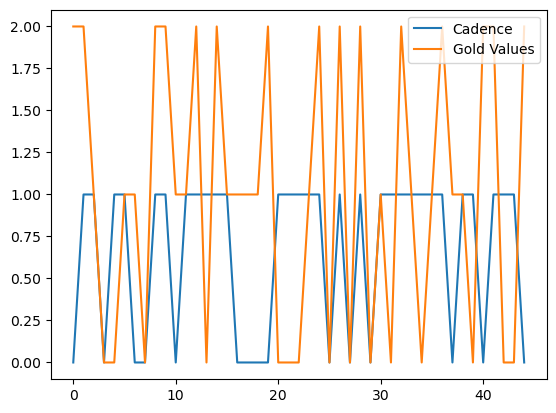

In [451]:
def create_file(Vlist, delay=10, filename="", current=None, continuous=None): #for writting the csv inputs
    """
    Vpwlf (nomizw) kai transient analysis
    (to arxeio tha sou pei posa usec na trekseis thn transient)
    (mhn ksexaseis to step!!!)

    :param Vlist: the list of voltages that will be transformed into a pulse series
    :param delay: delay between changing an input, 5 means 5 usec
    :param filename: the name of the file -> "variables" is proposed
    :param current: save currents instead of voltages
    :param continuous: import a real signal instead of pulses
    :return:
    """

    Varray = np.array(Vlist)
    if continuous is None:
        Total_time = Varray.shape[0] * delay
        if current is None:
            '''
            Last safeguard to not exceed your supply rails
            ###################################################################################################
            '''
            Varray[Varray >  2.2] = 2.2
            Varray[Varray < 0] = 0
        else:
            Varray[Varray > current[1]] = current[1]
            Varray[Varray < current[0]] = current[0]

        Varray_extended = np.zeros(len(Vlist) * 2)
        t = np.zeros(len(Vlist) * 2)

        for k in range(len(Vlist)):
            Varray_extended[2 * k:2 * (k + 1)] = Varray[k]
            t[2 * k] = delay * k
            t[2 * k + 1] = delay * (k + 1) - 0.5

        Varray_printed = np.zeros((len(Vlist) * 2, 2))

        Varray_printed[:, 0] = t * 1e-6
        if current is None:
            Varray_printed[:, 1] = Varray_extended
        else:
            Varray_printed[:, 1] = Varray_extended * 1e-9

        # print(Varray_printed)
        np.savetxt(filename + ".csv", Varray_printed, delimiter=" ")

        print(Total_time, "usec")
    else:
        fs = 1 / delay
        if current is None:
            " ###################################################################################################"
            Varray[Varray >2.2] = 2.2
            Varray[Varray < 0] = 0
        else:
            Varray[Varray > current[1]] = current[1]
            Varray[Varray < current[0]] = current[0]

        Total_time = len(Vlist) / fs
        t = np.linspace(0, Total_time, num=len(Vlist))

        Varray_printed = np.zeros((len(Vlist), 2))
        Varray_printed[:, 0] = t

        if current is None:
            Varray_printed[:, 1] = Varray
        else:
            Varray_printed[:, 1] = Varray * 1e-9

        # print(Varray_printed)
        np.savetxt(filename + ".csv", Varray_printed, delimiter=" ")

        print(Total_time, "sec")


if 1: #your main
    ran_state = 0
    '###################################################################################################'
    max_dimensions = 4 # change this according to the dimensions of the bump
    # stratified = 1
    # current_mode = [1, 2.5]  # None, [0, 15]
    current_mode = None
    # # TDD [1, 2.5]
    # # None is a preset condition based on the similarity
    # current_mode_2 = current_mode  # None
    # V_norm = [-0.1, 0.2]
    # multi_train = 0
    prt = 0
    shuffled = 1
    not_fixed_I = 1
    # full_dataset = 1
    # ran_state = 42
    pmos = 0
    inverse_data = 0
    quantized = 0
    conv_matrix = "diag"  # , "diag", "full"
    #########################
    # repeats = [0, 1, 2, 3]  # [0,1,2,3]
    # time_interval = 1
    # shuffle = 1
    # flat = 1
    '###################################################################################################'
    dataset = "Iris"
    # info = {"category": 'F1', 'drive': '12K_drive', 'outer': 'centered_6', 'channel': 'DE',
    #         "categories": ['F1', 'F2', 'F3', 'F4']}
    # channel = info["channel"]
    # category = info["category"]
    # diction = {"save_voltages": save_voltages}
    # diction["channel"] = channel
    # diction["full_dataset"] = full_dataset
    # diction["prt"] = prt
    # diction["shuffled"] = shuffled
    # diction["pmos"] = pmos
    # diction["inverse_data"] = inverse_data
    # diction["not_fixed_I"] = not_fixed_I
    # diction["quantized"] = quantized
    # diction["ran_state"] = ran_state
    # diction["category"] = category
    # diction["conv_matrix"] = conv_matrix
    """
    example code on creating the dictionary
    It does not work
    """
    '###################################################################################################'
    x, y = import_dataset(dataset="Iris")  # extra part
    print(max(y))

    x_train, y_train, x_val, y_val, nclass = stratified_split(x, y, ratio=0.7,ran_state=ran_state)

    n_features = x_train.shape[1]
    print("======================")
    print("Train set")
    print(x_train.shape)
    #for c in range(nclass):
        #print(y_train[y_train == c].shape)
    print("Validation set")
    print(x_val.shape)
    for i in range(x_train.shape[1]) :
        print(x_train[: , i])
    #for c in range(nclass):
        #print(y_val[y_val == c].shape)

    print("======================")
    k = 1
    model = GMM_touloup(n_classes=nclass, list_n_mixtures=[k, k, k], cov=conv_matrix,
                # mporoume na svisoume to ena k(3 classes)
                pmos=pmos, real=quantized, current_mode=current_mode,
                normalize=True, Vrange=(1.25,1.4) )  # , ratio=[0.50, 0.50])  # [19,19,19]) #ichanged True
    #print(x_train.shape)
    #print(y_train.shape)
#     print(y_train)
#     print("======================")
#     print(x_train)

    model.fit(x_train, y_train)  # ti kanoyn oles aytes oi parametroi poy orizoyme sto GMM() sbhnw ena k na dw

    predictions = model.predict(x_train, transform=True)
    error = np.count_nonzero(predictions - y_train)
    acc = (y_train.shape[0] - error) / y_train.shape[0]

    print("Train accuracy is", acc)
    print("max_dimensions", max_dimensions)
    print("model.n_classes", max_dimensions)

    predictions = model.predict(x_val, transform=True)

    error = np.count_nonzero(predictions - y_val)
    acc = (y_val.shape[0] - error) / y_val.shape[0]

    print("Validation accuracy is", acc)

    if nclass == 2:  # pithanon error
        print("Validation AUC is", auc_score(y_val, predictions))

    print(classification_report(y_val, predictions))
    # print(classification_report(y_val, np.zeros(y_val.shape)))
    '''
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_val, predictions), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
'''
    

    x_saved = model.transform(x_val)  # shuffled part
    y_saved = np.copy(y_val)
    # x_saved = model.transform(x)
    # y_saved = np.copy(y)

    '''
    Unshuffling data so that they can be read easier
    '''
    if not shuffled:
        x_u = []
        for i in range(int(np.max(y_saved) + 1)):
            if x_u == []:
                x_u = np.sort(x_saved[y_saved == i, :], axis=0)
                y_u = y_saved[y_saved == i]
                pred = predictions[y_saved == i]
            else:
                x_u = np.append(x_u, np.sort(x_saved[y_saved == i, :], axis=0), axis=0)
                y_u = np.append(y_u, y_saved[y_saved == i])
                pred = np.append(pred, predictions[y_saved == i])
            print(x_u[i])

        x_saved = x_u
        y_saved = y_u
        predictions = pred

    for i in range(max_dimensions):
        early = max_dimensions - n_features 
        if i < early:
            Vlist = 0.3* np.ones((2, 1))#itan 0.3 to ekana 0.9 
            filename = "/home/nassosliak/Desktop/avlsi/input_volt_iris/V" + str(i + 1)
        else:
            ii = i - early
            if prt:
                fig = plt.figure(figsize=(9, 9))
                plt.plot(x_saved[:, ii], label='x')
                plt.plot(y_saved / 3, label='y')
                plt.legend()
                # plt.show()
            filename = "/home/nassosliak/Desktop/avlsi/input_volt_iris/V" + str(i + 1)
            if inverse_data:
                Vlist = -x_saved[:, ii]
            else:
                Vlist = x_saved[:, ii]
                
        if 1:
          set1=0
#           print("aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa")
#           print(Vlist[y_saved==set1])
#           print(np.mean(Vlist[y_saved==set1]))
#           print(model.get_M(set1,0,i))
        create_file(Vlist, delay=10, filename=filename)
        diction = {"labels": y_saved}
        diction["predictions"] = predictions
        diction["X"] = x_saved
        savemat("/home/nassosliak/Desktop/avlsi/Iris/Extracted_data/labels1.mat", diction)

    n = model.n_classes
    m = model.list_n_mixtures
    mean = model.get_M
    sigma2 = model.sigma2

    Vdiction = {'"Vdd"': '"2.2"'}  # na allaksoume ta onomata
    Vdiction['"Vss"'] = '"0"'
    Vdiction['"Ibias_WTA"'] = '"70n"'
    Vdiction['"wcor"']='"6u"'
    Vdiction['"wdif"']='"31.5u"'
    Vdiction['"wmir"']='"33u"'
    Vdiction['"l"']='"2.4u"'
    Vdiction['"wwta"']='"7.5u"'
    # Vdiction['"Iwta2"'] = '"8n"


    if prt:  # gia na dw sigma+mean values
        counter = 1
        for j in range(max_dimensions):
            print("#####################")
            for i in range(n):
              name = '"' + "Vr" + str(counter+1) + '"'
              jj = j - early
              print(name + ':', np.round(mean(i, 0, jj), 5), "Vc", np.round(sigma2[i][0, jj], 6))
              #prostoparon na kratiso stathero to Vc
              #k= arithmos cluster (k=1) 
              #jj diastasi
              #i= clasi
              counter += 1

    counter = 0
    counter2= 0
    k=0
    for i in range(n):
        counter += 1
        if not_fixed_I:
            current = 10 * model.det_sigma[i][k]
            Vdiction['"Ibias' + str(counter) + '"'] = '"' + str(round(current, 1)) + 'n"'
            #str return the string version of object
        elif pmos:
            Vdiction['"Ibias' + str(counter) + '"'] = '"-40n"'
        else:
            Vdiction['"Ibias' + str(counter) + '"'] = '"40n"'
                
        counter3= counter2     
        for j in range(max_dimensions):
            counter3+=1
            #print(counter3)
            early = max_dimensions - n_features
            name = '"' + "Vr" + str(counter3) + '"'
            if j < early:
                Vdiction[name] = '"' + str(0.3) + '"'
            else:
                jj = j - early
                a=mean(i, 0, jj)
                #print(mean(i, k, jj))
                #print("======================================1")
                #print(a)
                if inverse_data:
                    Vdiction[name] = '"' + str(-a) + '"'
                else:
                    Vdiction[name] = '"' + str(a) + '"'        
        for j in range(max_dimensions):
            counter2+=1
            early = max_dimensions - n_features
            name = '"' + "Vc" + str(counter2)  + '"'
            if j < early:
                Vc = 0.3
            else:
                jj = j - early
                #print("11111111111111111")
                if conv_matrix == "diag":
                    Vc = model.get_Vc(sigma2[i][k, jj], real=quantized)
                    # sigma = math.sqrt(sigma2[i][k,j])
                else:
                    Vc = model.get_Vc(sigma2[i][k, jj, jj], real=quantized)
                    # sigma = math.sqrt(sigma2[i][k,j,j])
                    # Vdiction[name] = '"' + str(fc.transform_Vc(sigma, errors = True)) + '"'

            Vdiction[name] = '"' + str(Vc) + '"'
    change_variables_file(folder="/home/nassosliak/Desktop/avlsi/Iris/variables", Vdiction=Vdiction)  # allazei to path
    read_and_classify_all_old(type="taxinomitis", delay=10e-6)


# Addons

Mean Power Consumption:  1.1172987506789788e-05


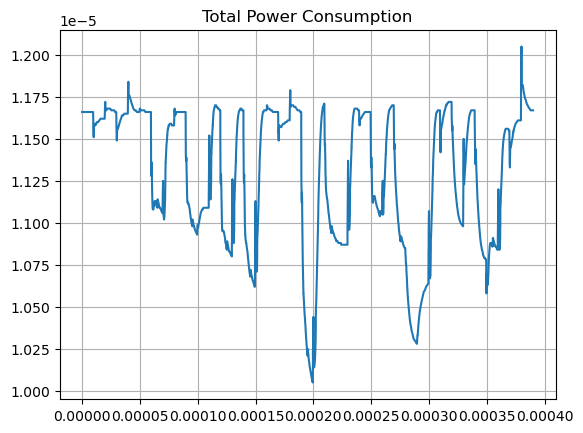

In [ ]:
file="/home/nassosliak/Desktop/avlsi/Iris/cadence/all.csv"
data=pd.read_csv(file)
power=data.iloc[:,4]
time=data.iloc[:,0]
i1=data.iloc[:,1]
print("Mean Power Consumption: ", np.mean(power))
plt.figure()
plt.grid()
plt.title("Total Power Consumption")
plt.plot(time,power)

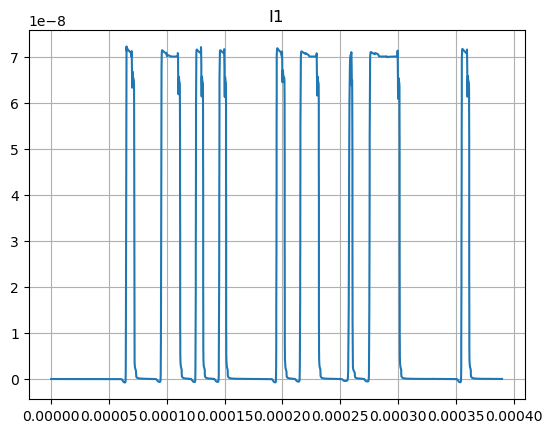

In [ ]:
plt.figure()
plt.grid()
plt.title("I1")
plt.plot(time,i1)